Model Comparison:
-----------------

Linear Regression:
MSE: 0.0386
RMSE: 0.1964
R-squared: 0.9533

Decision Tree:
MSE: 0.1087
RMSE: 0.3297
R-squared: 0.8686

Random Forest:
MSE: 0.0578
RMSE: 0.2404
R-squared: 0.9301

Best model based on RMSE: Linear Regression
Linear Regression model saved as 'linear_regression_model.pkl'

Feature Importance (Random Forest):
   Importance          Feature
0    0.855513         Absences
1    0.062110  StudyTimeWeekly
2    0.033221  ParentalSupport
3    0.015066         Tutoring
4    0.008549  Extracurricular
5    0.007851           Sports
6    0.007665              Age
7    0.004480            Music
8    0.003164           Gender
9    0.002382     Volunteering


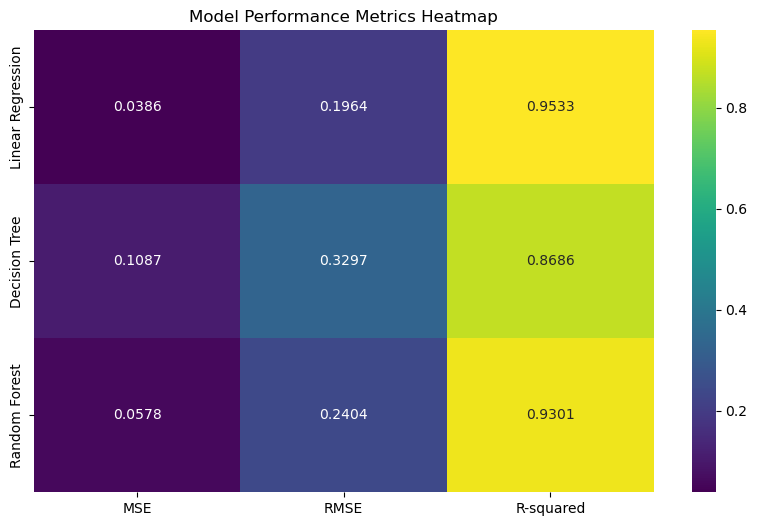

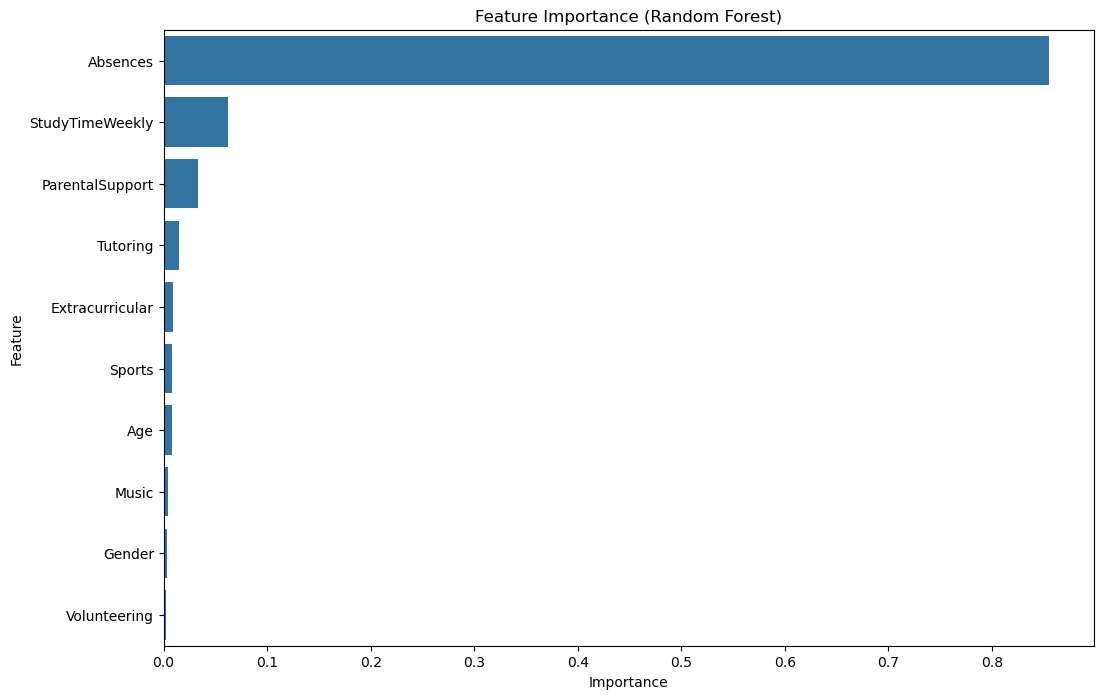

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from math import sqrt
import pickle

# Load the data
data = pd.read_csv('Student_performance_data _.csv')

# Prepare features and target (updated)
feature_columns = ['Age', 'Gender', 'StudyTimeWeekly', 'Absences', 'Tutoring', 
                   'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
X = data[feature_columns]
y = data['GPA']

# Encode categorical variables
le = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = le.fit_transform(X[column])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2
    }

# Print results
print("Model Comparison:")
print("-----------------")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}")
    print(f"R-squared: {metrics['R-squared']:.4f}")

# Determine the best model based on RMSE
best_model = min(results, key=lambda x: results[x]['RMSE'])
print(f"\nBest model based on RMSE: {best_model}")

# Save the Linear Regression model to a .pkl file
linear_reg_model = models["Linear Regression"]
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(linear_reg_model, file)

print("Linear Regression model saved as 'linear_regression_model.pkl'")

# Feature importance for Random Forest
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
feature_imp = pd.DataFrame(sorted(zip(importances, feature_columns), reverse=True), 
                           columns=['Importance', 'Feature'])

print("\nFeature Importance (Random Forest):")
print(feature_imp)

# Visualization
# Model Performance Heatmap
metrics_df = pd.DataFrame(results).T
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap='viridis', fmt=".4f")
plt.title('Model Performance Metrics Heatmap')
plt.show()

# Feature Importance Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importance (Random Forest)')
plt.show()
